# E-Commerce Customer Segmentation and Behavior Analysis

This project aims to analyze customer behavior using RFM (Recency, Frequency, Monetary) analysis and segment customers using K-Means Clustering. The dataset used is an e-commerce dataset containing transactions.

## Step 1: Import Necessary Libraries

We will start by importing the necessary libraries for data manipulation, visualization, and clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Enable inline plotting
%matplotlib inline

## Step 2: Load and Inspect the Dataset

We will load the dataset and inspect its structure, data types, and check for any missing values. Additionally, we will convert the `InvoiceDate` column to datetime format.

In [2]:
# Load the dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Display the first few rows of the dataset
print(df.head())

# Display the dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Check if CustomerID column exists
if 'CustomerID' not in df.columns:
    raise KeyError("CustomerID column does not exist in the dataset")

# Keep only relevant columns
df = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

## Step 3: Exploratory Data Analysis (EDA)

We will perform exploratory data analysis to understand the distribution of data and key statistics. We will also calculate the total sales by country.

            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


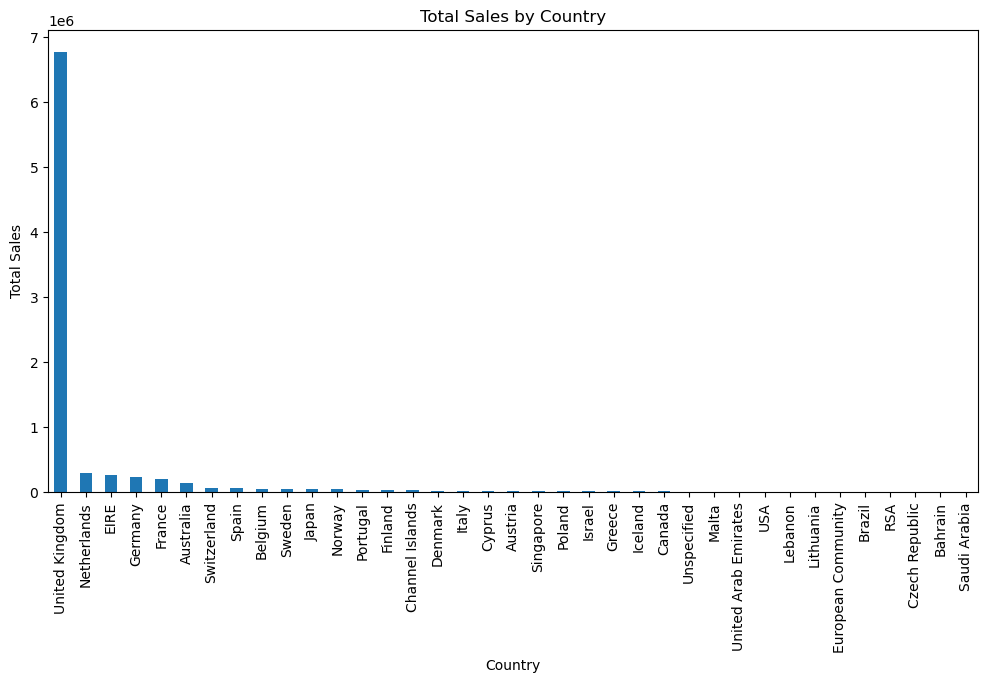

In [3]:
# Display basic statistics
print(df.describe())

# Calculate the total price for each invoice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Total sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

## Step 4: Customer Segmentation using K-Means Clustering

We will conduct RFM (Recency, Frequency, Monetary) analysis and use K-Means Clustering to segment customers into different groups.

In [7]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the last date in the dataset for recency calculation
max_date = df['InvoiceDate'].max()

# RFM (Recency, Frequency, Monetary) analysis
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_

# Display the mean values of RFM metrics for each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'NumCustomers'})

print(cluster_summary)

            Recency    Frequency       Monetary  NumCustomers
Cluster                                                      
0         39.254284   106.455630    2012.242253          3268
1          8.000000  1013.400000  192103.854000             5
2          1.000000  5914.000000   64776.602500             4
3        246.329680    27.588128     460.668905          1095


## Step 5: Behavioral Analysis and Visualization

We will visualize the customer segments using scatter plots to understand the distribution of different clusters based on Recency and Monetary values.

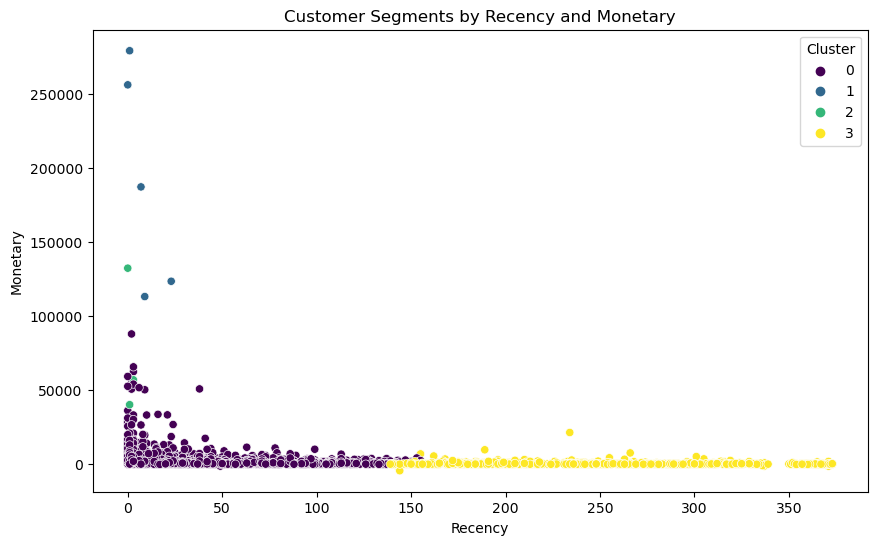

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments by Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()

---

<div style="text-align: center;">
    <h2 style="font-family: 'Courier New', Courier, monospace; color: #2e6c80; font-weight: bold;">
        Süheyl Özdemir
    </h2>
    <p style="font-family: 'Georgia', serif; color: #2e6c80; font-weight: bold;">
        Data Scientist & AI Volunteer
    </p>
</div>